<a href="https://colab.research.google.com/github/wwefddd/Numerical-Analysis/blob/main/Numerical_Analysis_Poisson_Equation_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

error ratio 까지 계산한 것

Discrete Laplacian matrix =
 [[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]
Approximate solution = [ 

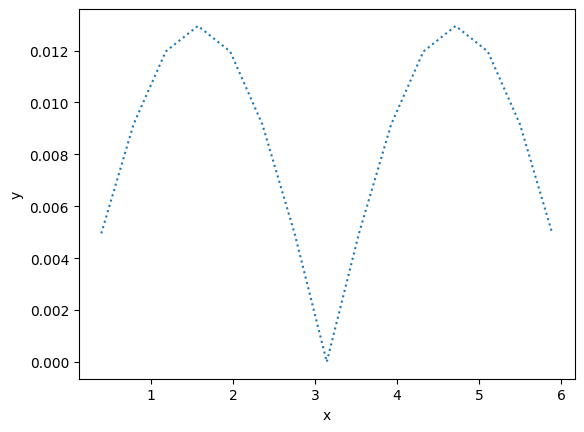

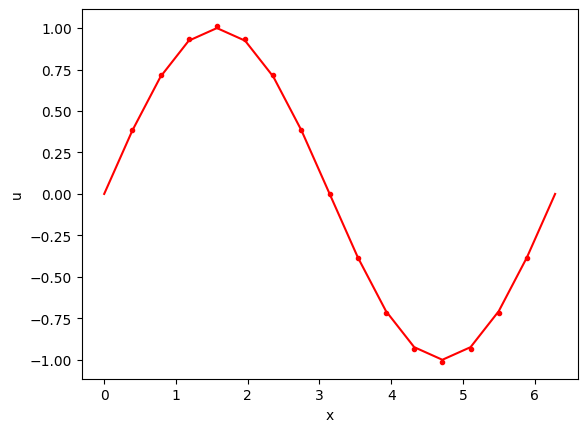

maximum error ratio (M=4)/(M=8) :  4.407009050151492
maximum error ratio (M=8)/(M=16) :  4.094689571522958
maximum error ratio (M=16)/(M=32) :  4.0232649235339375
maximum error ratio (M=32)/(M=64) :  4.005791254163122
maximum error ratio (M=64)/(M=128) :  4.001446260116105
maximum error ratio (M=128)/(M=256) :  4.000361465009851
maximum error ratio (M=256)/(M=512) :  4.00009034701565
maximum error ratio (M=512)/(M=1024) :  4.00002233935979
L2 error ratio (M=4)/(M=8) :  4.4070090501515
L2 error ratio (M=8)/(M=16) :  4.094689571522982
L2 error ratio (M=16)/(M=32) :  4.023264923535769
L2 error ratio (M=32)/(M=64) :  4.005791254179791
L2 error ratio (M=64)/(M=128) :  4.00144626013528
L2 error ratio (M=128)/(M=256) :  4.000361467660674
L2 error ratio (M=256)/(M=512) :  4.00009035649787
L2 error ratio (M=512)/(M=1024) :  4.000022459367092


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Solve a Poisson equation u'' = f
# where f(x) = -sin(x) with u(0, 2*pi) = 0 on the boundary.
# The exact solution is u(x) = sin(x)

a, b = 0, 2*np.pi
#a, b = np.pi/2, 5*np.pi/2

M = 4 # Number of intervals(At least 4)
N = M + 1 # Number of points including boundary points
h = (b-a)/(N-1) # Mesh width

x = np.linspace(a,b,N)
u = np.sin(x) # The exact solution (size N)

# Construct the discrete Laplacian matrix 'L'
L = np.zeros((N-2, N-2))
L[0,0] = -2
L[0, 1] = 1
L[N-3, N-4] = 1
L[N-3, N-3] = -2
for i in range(1, N-3):
  L[i, i-1 : i+2] = [1, -2, 1]

print('Discrete Laplacian matrix =\n', L)

# Construct the Right-Hand Side (size N-2)
f = -np.sin(x[1:N-1]) * h**2
#여기에 constant term 더하면 될듯?
# print(f)

#Solve the discrete Poisson equation
# The approximate solution 'v' (size N-2)
v = np.dot(np.linalg.inv(L), f)
print('Approximate solution =', v)
err = np.abs(u[1:N-1] - v)
print('pointwise error=', err)
print('maximum error =', np.max(err))
print('L2 error =', np.sqrt(sum(err**2)/(N-1)))

plt.figure()
plt.plot(x[1:N-1], err, ':')
plt.xlabel('x')
plt.ylabel('y')
plt.figure()
plt.plot(x,u,'r-')
plt.plot(x[1:N-1], v, 'r.')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

def error_ratio(M):
  a, b = 0, 2*np.pi

  M = M
  N = M + 1
  h = (b-a)/(N-1)

  x = np.linspace(a,b,N)
  u = np.sin(x)

  L = np.zeros((N-2, N-2))
  L[0,0] = -2
  L[0, 1] = 1
  L[N-3, N-4] = 1
  L[N-3, N-3] = -2
  for i in range(1, N-3):
    L[i, i-1 : i+2] = [1, -2, 1]


  f = -np.sin(x[1:N-1]) * h**2
  # print(f)
  v = np.dot(np.linalg.inv(L), f)

  err = np.abs(u[1:N-1] - v)
  max_err = np.max(err)
  L2_err = np.sqrt(sum(err**2)/(N-1))
  return max_err, L2_err
  # L2_err1 = np.sqrt(sum(err**2)/(N-1))

  # print(f"maximum error ratio (M={M1})/(M={M2}) : ", max_err1 / max_err2)
  # print(f"L2 error ratio (M={M1})/(M={M2}) : ", L2_err1 / L2_err2)

def print_err_ratio(j, k):
  for i in range(j, k):
    print(f"maximum error ratio (M={2**i})/(M={2**(i+1)}) : ", error_ratio(2**i)[0] / error_ratio(2**(i+1))[0])

  for i in range(j, k):
    print(f"L2 error ratio (M={2**i})/(M={2**(i+1)}) : ", error_ratio(2**i)[1] / error_ratio(2**(i+1))[1])

print_err_ratio(2, 10)


실제로 예제 문제 (u(a)와 u(b)가 0이 아님) 을 푼것
원래 pdf와 비교해보고 필요없는 부분은 빼라


Discrete Laplacian matrix =
 [[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]
Approximate solution = [ 

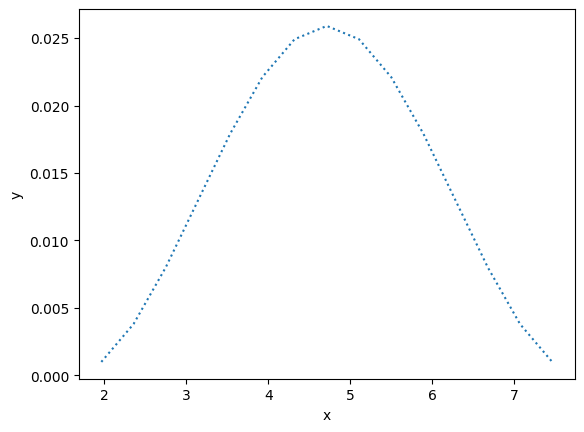

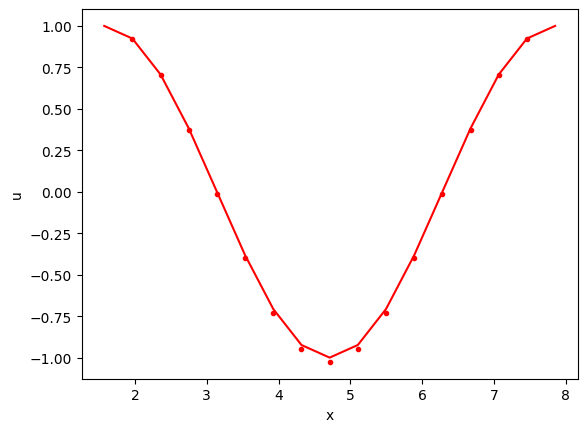

maximum error ratio (M=4)/(M=8) :  4.407009050151492
maximum error ratio (M=8)/(M=16) :  4.094689571522958
maximum error ratio (M=16)/(M=32) :  4.0232649235339375
maximum error ratio (M=32)/(M=64) :  4.005791254163122
maximum error ratio (M=64)/(M=128) :  4.001446260116105
maximum error ratio (M=128)/(M=256) :  4.000361465009851
maximum error ratio (M=256)/(M=512) :  4.00009034701565
maximum error ratio (M=512)/(M=1024) :  4.00002233935979
L2 error ratio (M=4)/(M=8) :  4.4070090501515
L2 error ratio (M=8)/(M=16) :  4.094689571522982
L2 error ratio (M=16)/(M=32) :  4.023264923535769
L2 error ratio (M=32)/(M=64) :  4.005791254179791
L2 error ratio (M=64)/(M=128) :  4.00144626013528
L2 error ratio (M=128)/(M=256) :  4.000361467660674
L2 error ratio (M=256)/(M=512) :  4.00009035649787
L2 error ratio (M=512)/(M=1024) :  4.000022459367092


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Solve a Poisson equation u'' = f
# where f(x) = -sin(x) with u(0, 2*pi) = 0 on the boundary.
# The exact solution is u(x) = sin(x)

#a, b = 0, 2*np.pi
a, b = np.pi/2, 5*np.pi/2

M = 16 # Number of intervals (At least 4)
N = M + 1 # Number of points including boundary points
h = (b-a)/(N-1) #Mesh width

x = np.linspace(a,b,N)
u = np.sin(x) # The exact solution (size N)

# Construct the discrete Laplacian matrix 'L'
L = np.zeros((N-2, N-2))
L[0,0] = -2
L[0, 1] = 1
L[N-3, N-4] = 1
L[N-3, N-3] = -2
for i in range(1, N-3):
  L[i, i-1 : i+2] = [1, -2, 1]

print('Discrete Laplacian matrix =\n', L)

# Construct the Right-Hand Side (size N-2)
f = -np.sin(x[1:N-1]) * h**2
#print(f)

# Add boundary condition (constant term) (  u(a) =1, u(b) =1  )
#print(np.sin(a), np.sin(b))
f[0] = f[0] - np.sin(a) # np.sin(a) = -1
f[N-3] = f[N-3] - np.sin(b) # or f[-1] = f[-1] - 1

# Solve the discrete Poisson equation
# The approximate solution 'v' (size N-2)
v = np.dot(np.linalg.inv(L), f)

print('Approximate solution =', v)
err = np.abs(u[1:N-1] - v)
print('pointwise error=', err)
print('maximum error =', np.max(err))
print('L2 error =', np.sqrt(sum(err**2)/(N-1)))

# Plot the error
plt.figure()
plt.plot(x[1:N-1], err, ':')
plt.xlabel('x')
plt.ylabel('y')
plt.figure()

# Plot the solutions
plt.plot(x,u,'r-')
plt.plot(x[1:N-1], v, 'r.')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

def error_ratio(M):
  a, b = 0, 2*np.pi

  M = M
  N = M + 1
  h = (b-a)/(N-1)

  x = np.linspace(a,b,N)
  u = np.sin(x)

  L = np.zeros((N-2, N-2))
  L[0,0] = -2
  L[0, 1] = 1
  L[N-3, N-4] = 1
  L[N-3, N-3] = -2
  for i in range(1, N-3):
    L[i, i-1 : i+2] = [1, -2, 1]


  f = -np.sin(x[1:N-1]) * h**2
  # print(f)
  v = np.dot(np.linalg.inv(L), f)

  err = np.abs(u[1:N-1] - v)
  max_err = np.max(err)
  L2_err = np.sqrt(sum(err**2)/(N-1))
  return max_err, L2_err
  # L2_err1 = np.sqrt(sum(err**2)/(N-1))

  # print(f"maximum error ratio (M={M1})/(M={M2}) : ", max_err1 / max_err2)
  # print(f"L2 error ratio (M={M1})/(M={M2}) : ", L2_err1 / L2_err2)


def print_err_ratio(j, k):
  for i in range(j, k):
    print(f"maximum error ratio (M={2**i})/(M={2**(i+1)}) : ", error_ratio(2**i)[0] / error_ratio(2**(i+1))[0])

  for i in range(j, k):
    print(f"L2 error ratio (M={2**i})/(M={2**(i+1)}) : ", error_ratio(2**i)[1] / error_ratio(2**(i+1))[1])

print_err_ratio(2, 10)


cos 문제 풀자


4
